In [3]:
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

NUM_FEATURES = 2
NUM_ITER = 200
learning_rate = 0.01

W:[0.39080566 0.38787308]
b:[-1.0801327]
plot_y: [2.9862702 1.5756853]


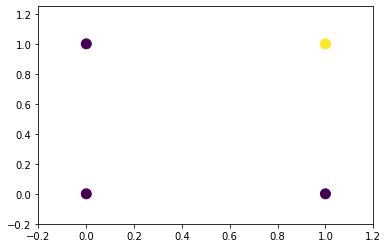

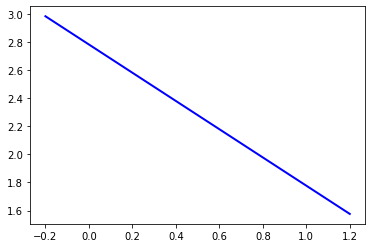

In [12]:
#%% perceptron as a simple linear classifier

x = np.array([[0, 0], [1, 0], [1, 1], [0, 1]], np.float32)  # 4x2, input
y = np.array([0, 0, 1, 0], np.float32)                      # 4, correct output, AND operation
#y = np.array([0, 1, 1, 1], np.float32)                     # OR operation

W = np.zeros(NUM_FEATURES, np.float32)                      # 2x1, weight
b = np.zeros(1, np.float32)                                 # 1x1

N, d = np.shape(x)           # number of samples and number of features

# process each sample separately
for k in range(NUM_ITER):
    for j in range(N):
        yHat_j = x[j, :].dot(W) + b    # 1x2, 2x1
        yHat_j = 1.0 / (1.0 + np.exp(-yHat_j))

        err = y[j] - yHat_j      # error term

        deltaW = err * x[j, :]
        deltaB = err
        W = W + learning_rate * deltaW              # if err = y - yHat, then W = W + lRate * deltW
        b = b + learning_rate * deltaB


# Now plot the fitted line. We need only two points to plot the line
plot_x = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])
plot_y = - 1 / W[1] * (W[0] * plot_x + b)  # comes from, w0*x + w1*y + b = 0  then y = (-1/w1) (w0*x + b)

print('W:' + str(W))
print('b:' + str(b))
print('plot_y: '+ str(plot_y))

plt.scatter(x[:, 0], x[:, 1], c=y, s=100, cmap='viridis')
plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()
plt.plot(plot_x, plot_y, color='b', linewidth=2)